In [25]:
import os
os.environ['DATAPATH'] = os.path.join(os.getcwd(), 'data')
os.environ['LOG_DIR'] = os.path.join(os.getcwd(), 'logs')

! python train_graph_iteration.py \
    --task lp \
    --act None \
    --dataset library_learning\
    --model HyboNet \
    --lr 0.025 \
    --dim 3 \
    --num-layers 2 \
    --bias 1 \
    --dropout 0.25 \
    --weight-decay 1e-3 \
    --manifold Lorentz \
    --log-freq 5 \
    --cuda -1 \
    --patience 500 \
    --grad-clip 0.1 \
    --seed 1234 \
    --save 1


INFO:root:Using: cpu
INFO:root:Using seed 1234.
INFO:root:Use Super Node : True
INFO:root:Use Batch Learning : True
INFO:root:Use Margin Loss : True
INFO:root:Use CT + Myelination : False
INFO:root:Step Size for Reduction Factor (Gamma) for learning rate : None
INFO:root:Reduction Factor (Gamma) for learning rate : 0.5
INFO:root:Using Only 1st 872 Subjects
INFO:root:RANDOMLY INITIALIZED ADJACENCY MATRIX: [[1 1 0 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 [0 0 0 ... 1 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 [1 1 0 ... 1 1 0]]
INFO:root:<unk> not in BERT Embeddings
INFO:root:Returning random embedding
INFO:root:<unk> not in BERT Embeddings
INFO:root:Returning random embedding
INFO:root:<unk> not in BERT Embeddings
INFO:root:Returning random embedding
INFO:root:<unk> not in BERT Embeddings
INFO:root:Returning random embedding
INFO:root:<unk> not in BERT Embeddings
INFO:root:Returning random embedding
INFO:root:RANDOMLY INITIALIZED ADJACENCY MATRIX: [[1 1 1 ... 1 1 1]
 [1 0 0 ... 1 0 1]
 [1 0

In [33]:
import os
os.environ['DATAPATH'] = os.path.join(os.getcwd(), 'data')
os.environ['LOG_DIR'] = os.path.join(os.getcwd(), 'logs')

! python train_graph_iteration.py \
    --task lp \
    --act None \
    --dataset library_learning\
    --model HyboNet \
    --lr 0.025 \
    --dim 3 \
    --num-layers 2 \
    --bias 1 \
    --dropout 0.25 \
    --weight-decay 1e-3 \
    --manifold Lorentz \
    --log-freq 5 \
    --cuda -1 \
    --patience 500 \
    --grad-clip 0.1 \
    --seed 1234 \
    --save 1


INFO:root:Using: cpu
INFO:root:Using seed 1234.
INFO:root:Use Super Node : False
INFO:root:Use Batch Learning : True
INFO:root:Use Margin Loss : True
INFO:root:Use CT + Myelination : False
INFO:root:Step Size for Reduction Factor (Gamma) for learning rate : None
INFO:root:Reduction Factor (Gamma) for learning rate : 0.5
INFO:root:Using Only 1st 872 Subjects
C:\Users\rarh9\Desktop\MIT\6.8610\educational_concept_librarian\fhnn\utils\data_utils.py:153: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:619.)
  return torch.sparse.FloatTensor(indices, values, shape)
INFO:root:LPModel(
  (manifold): Lorentz manifold
  (encoder): HyboNet(
    (manifold): Lorentz manifold
    (layers): Sequential(
      (0): LorentzGraphConvolution(
        (linear): LorentzLinear(
          (manifold): Lorentz manifold
          (weig

C:\Users\rarh9\AppData\Local\Temp\ipykernel_1512\1271444479.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Test_Loss: 2.043561
Test_ROC: 0.067485
Test_Average_Precision: 0.357462
Test_Accuracy: 0.499779


(2.043561, 0.067485, 0.357462)

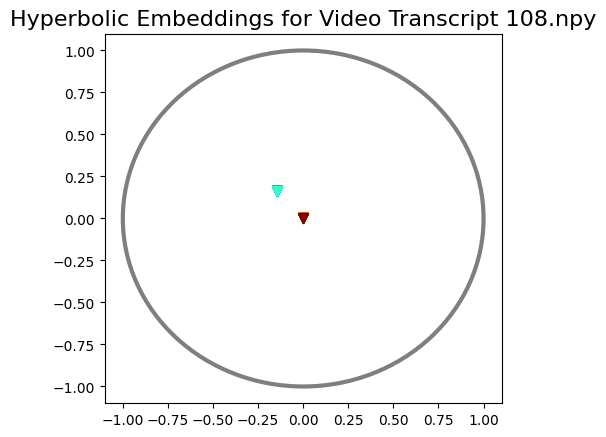

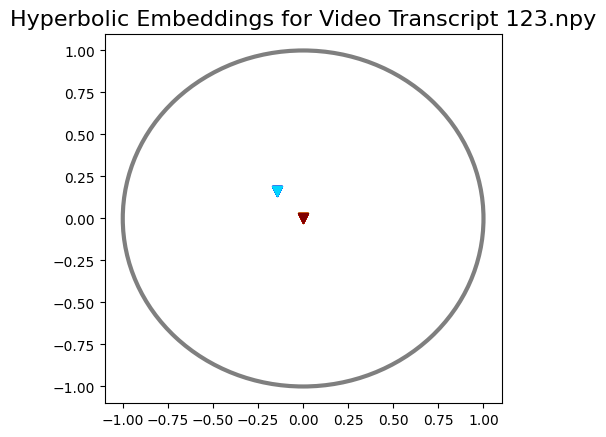

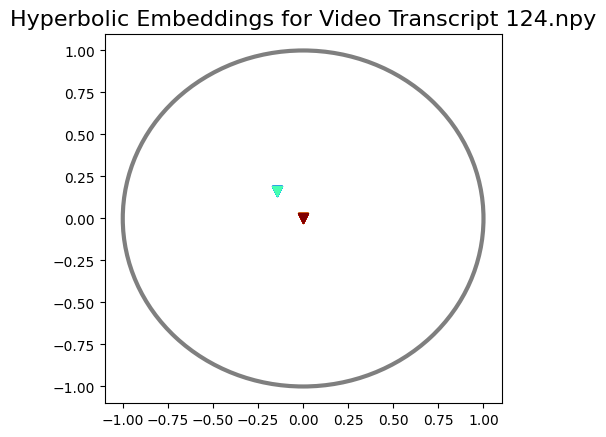

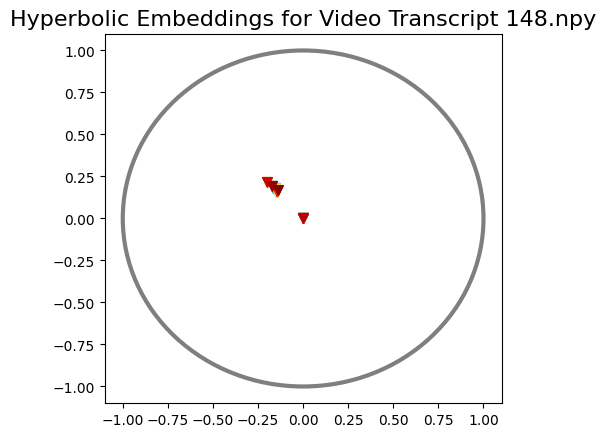

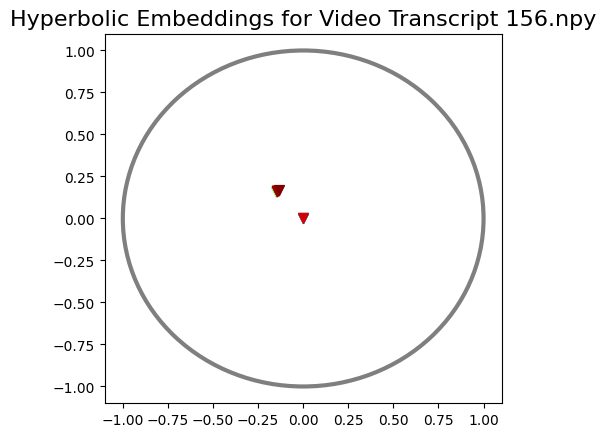

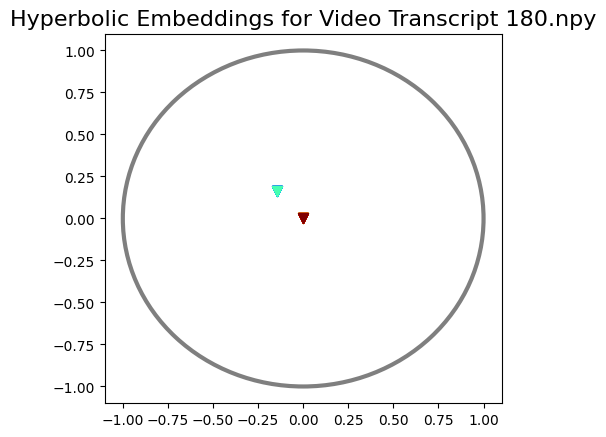

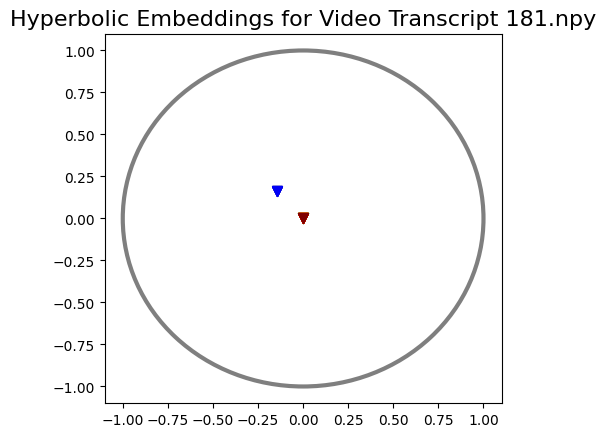

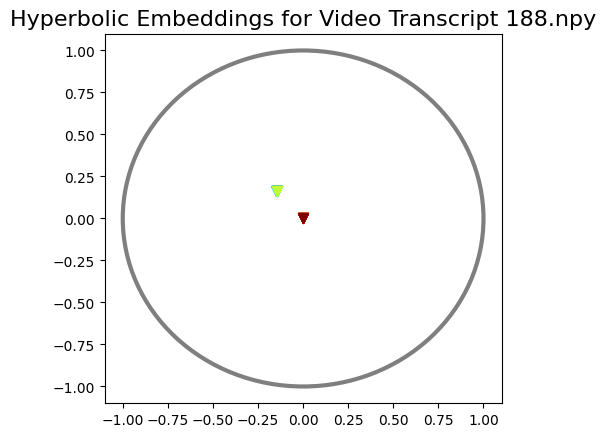

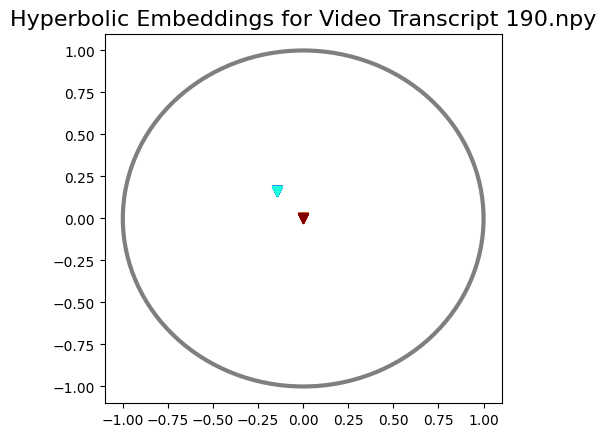

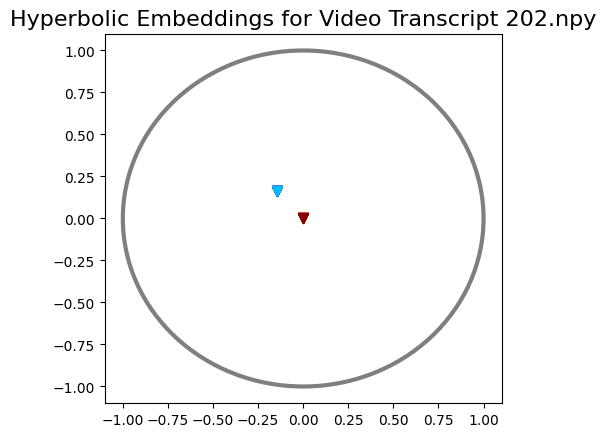

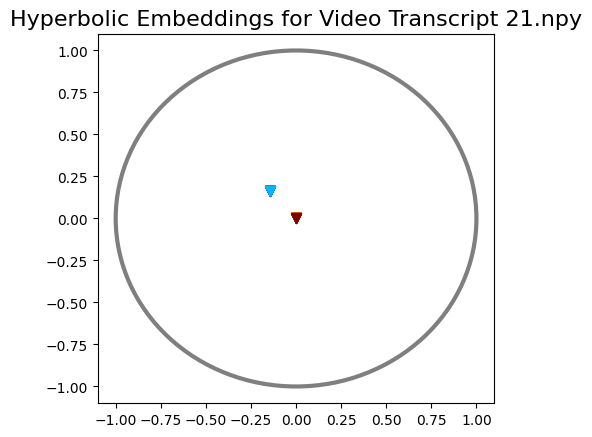

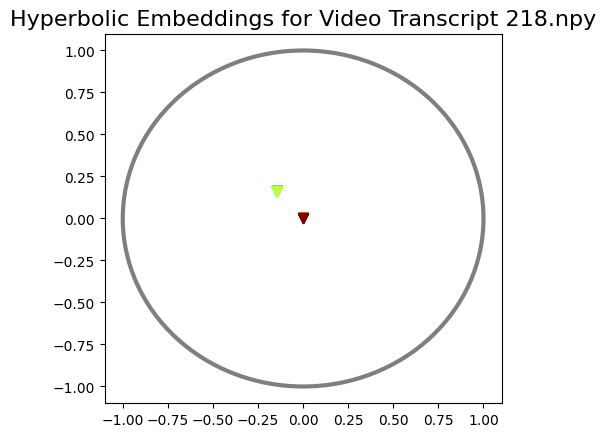

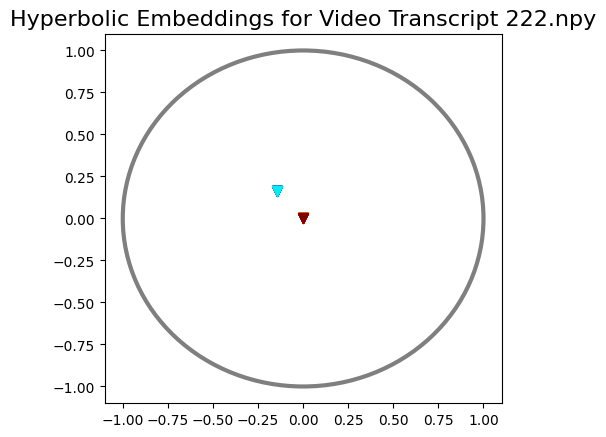

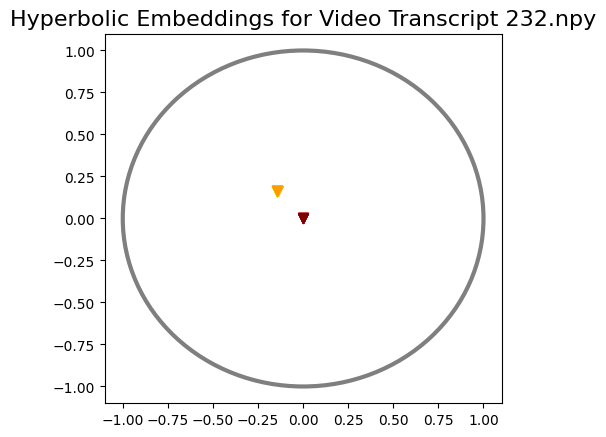

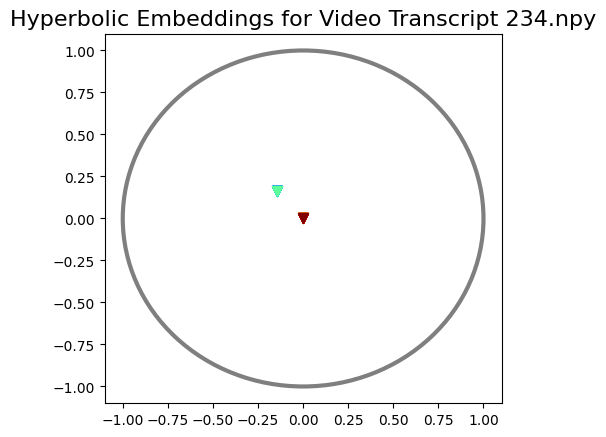

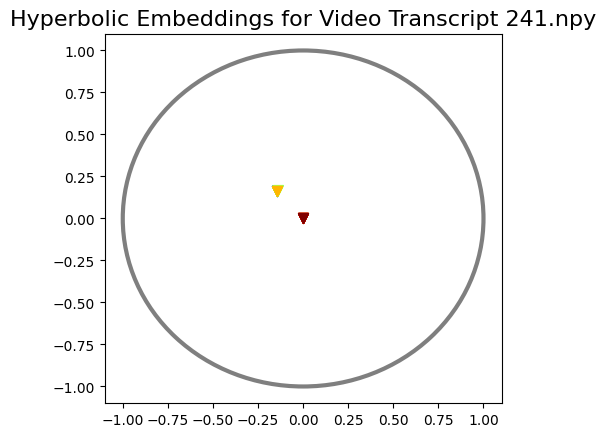

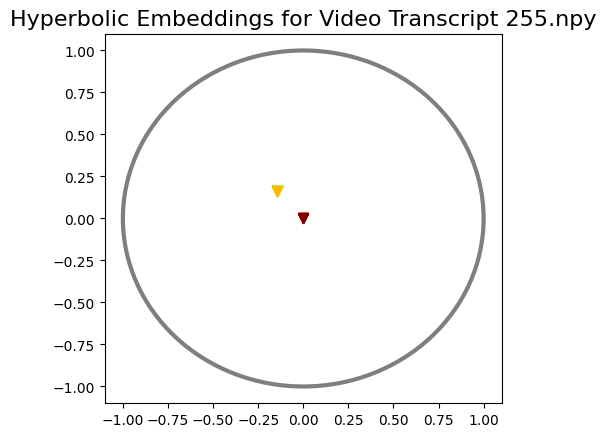

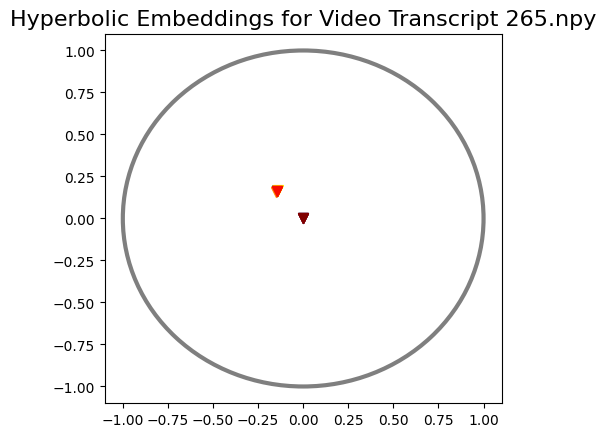

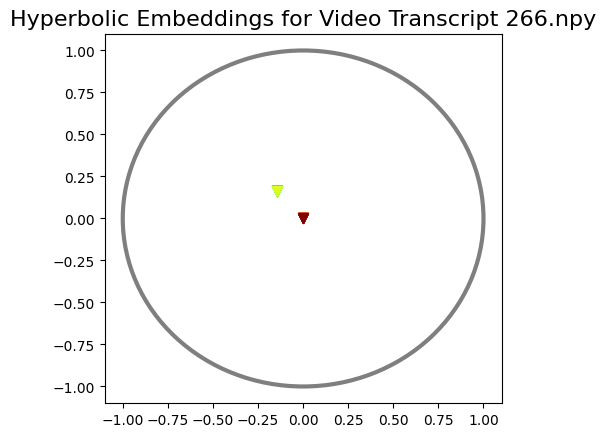

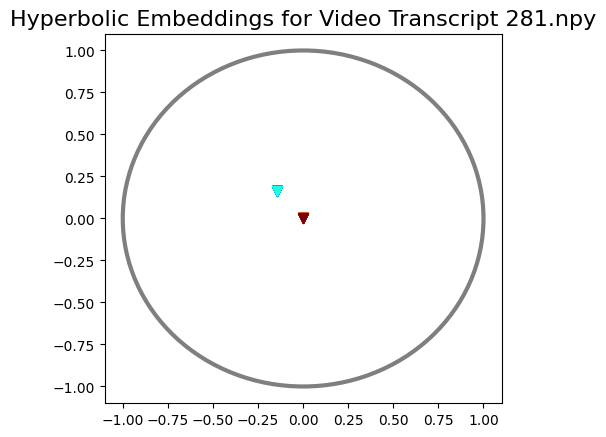

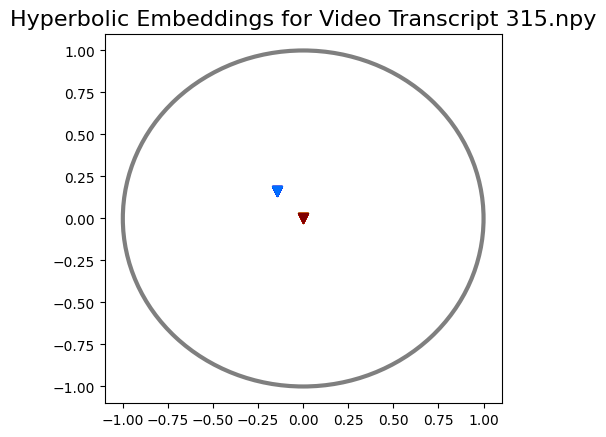

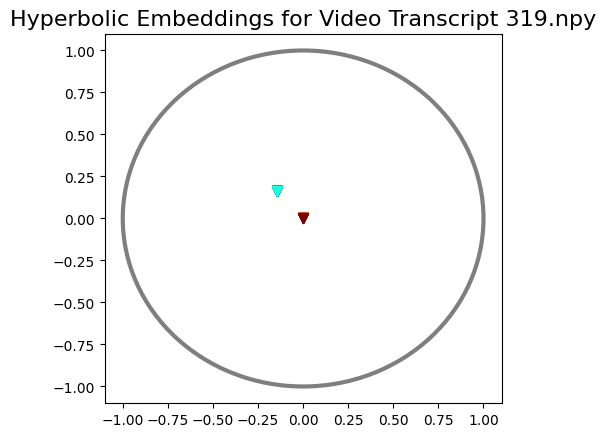

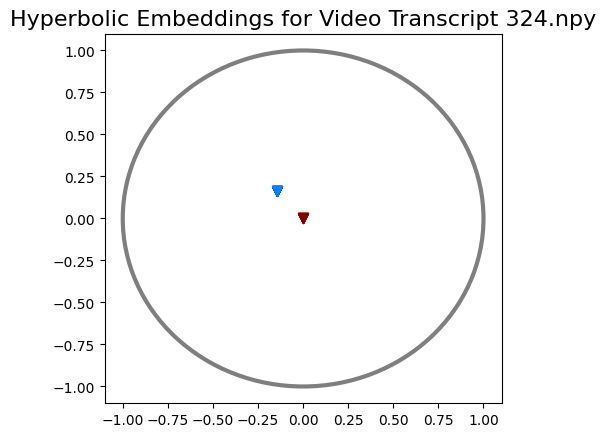

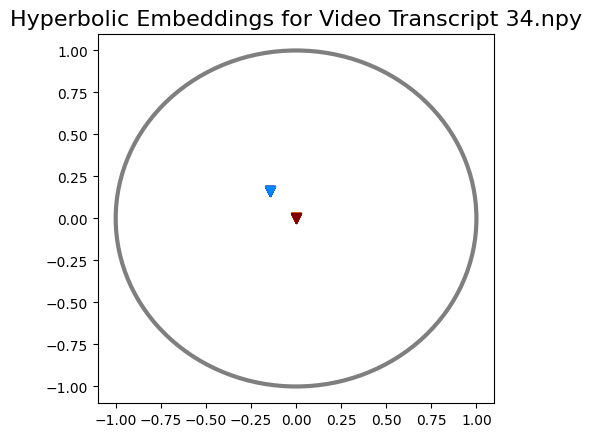

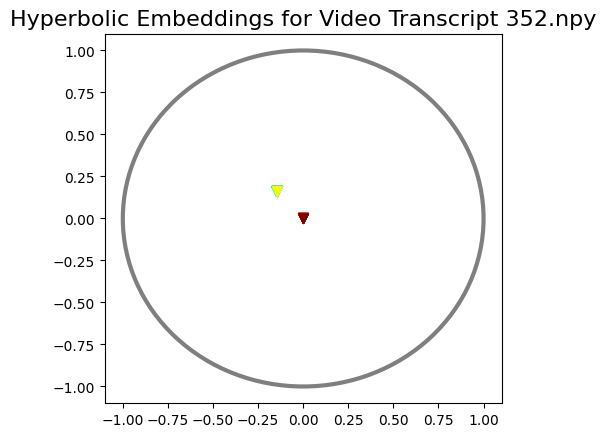

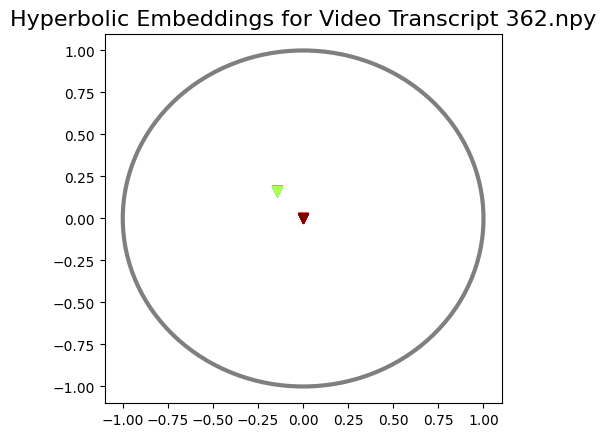

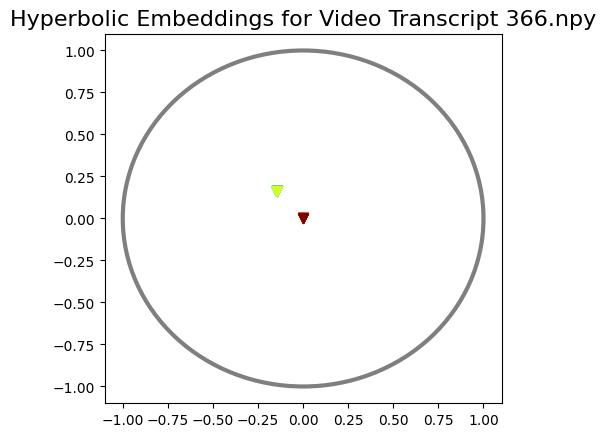

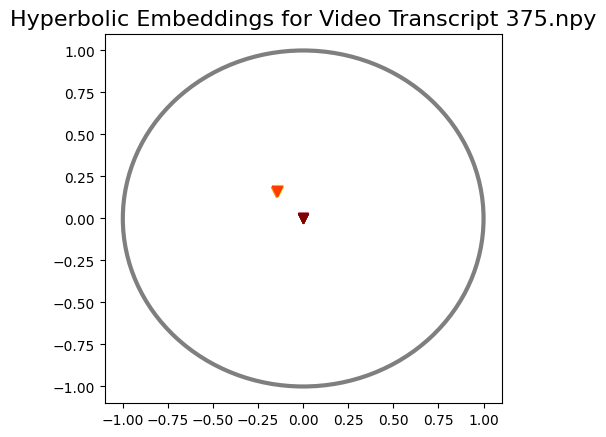

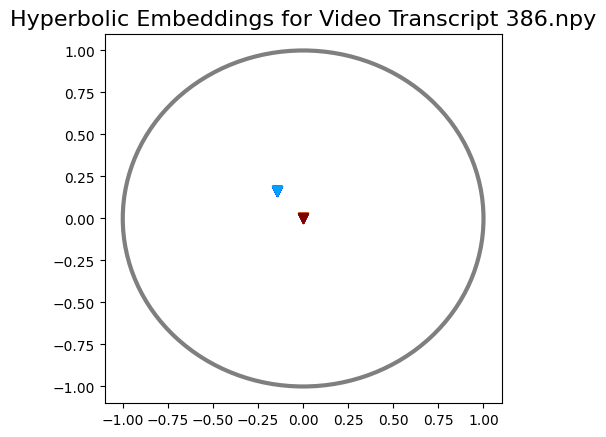

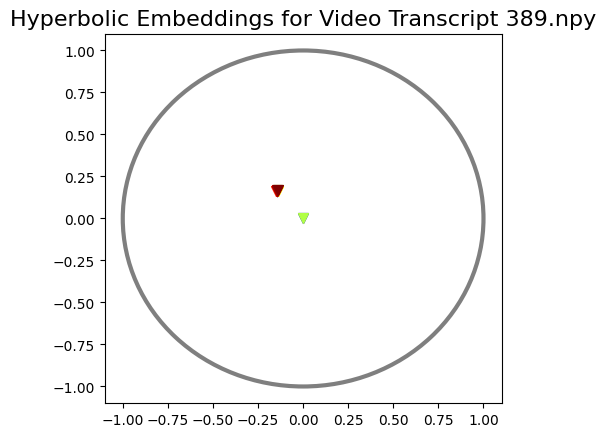

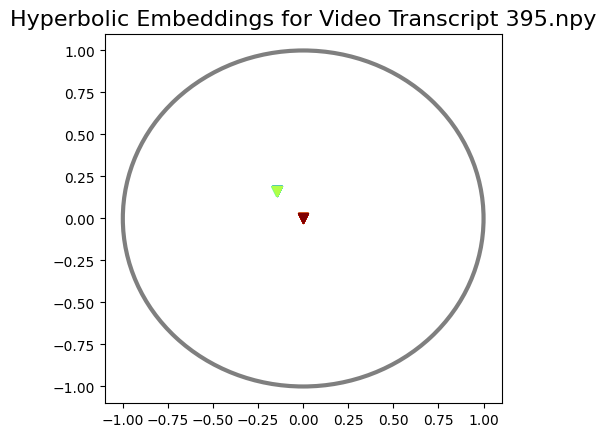

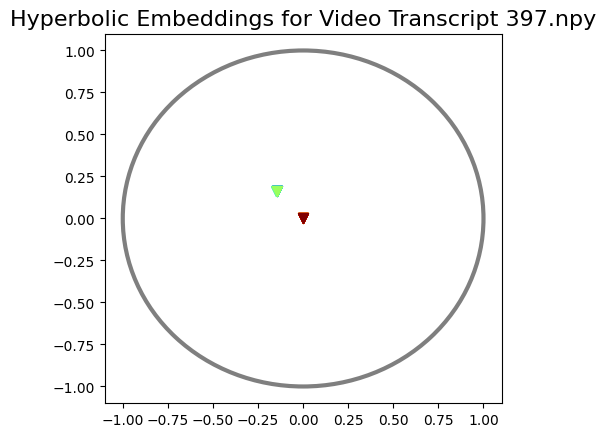

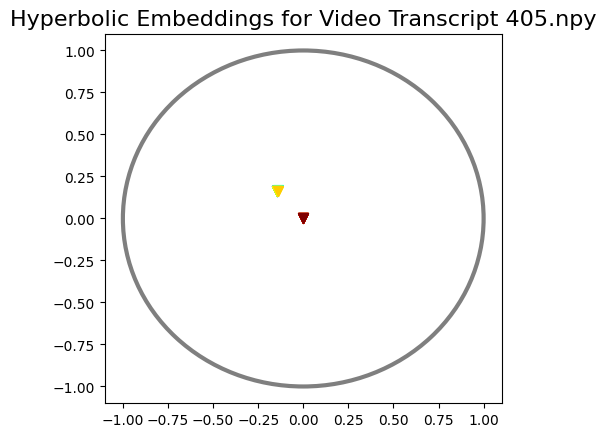

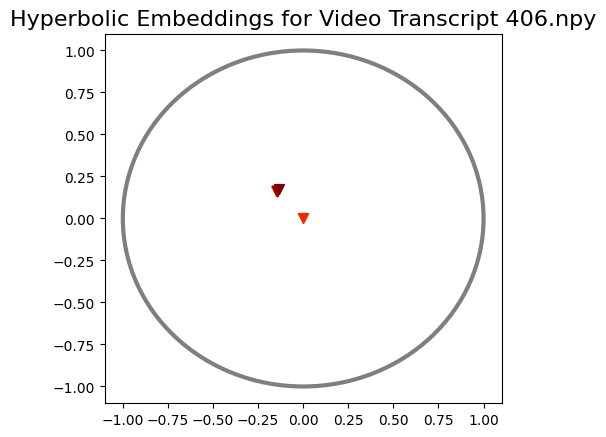

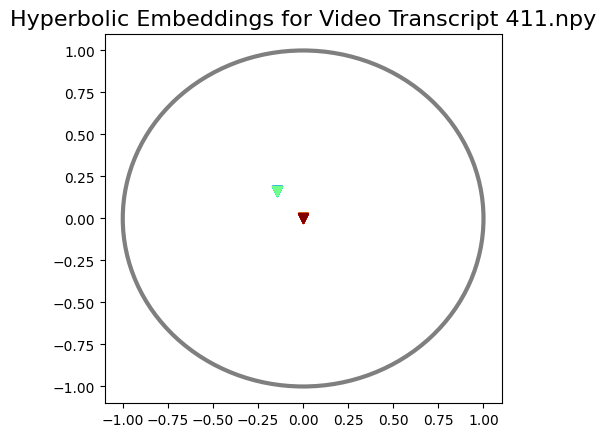

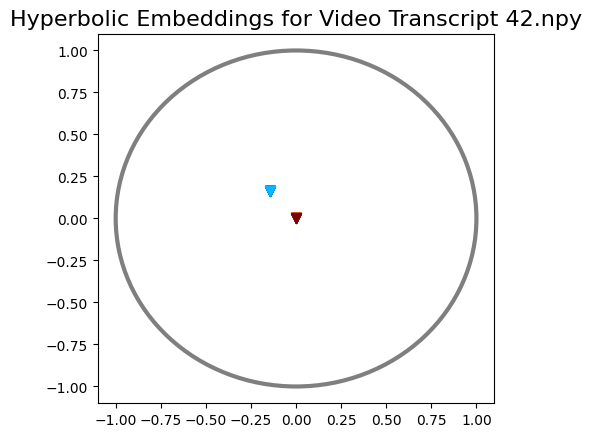

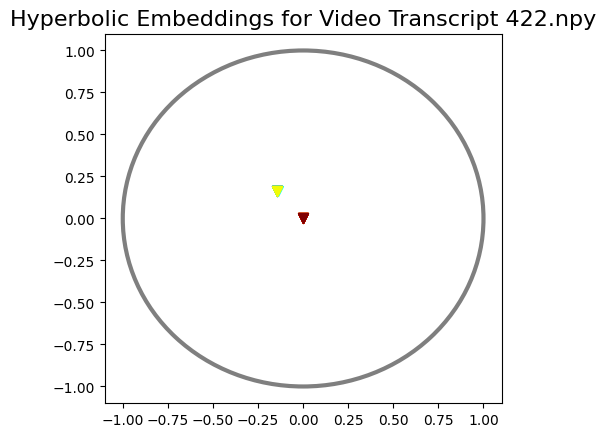

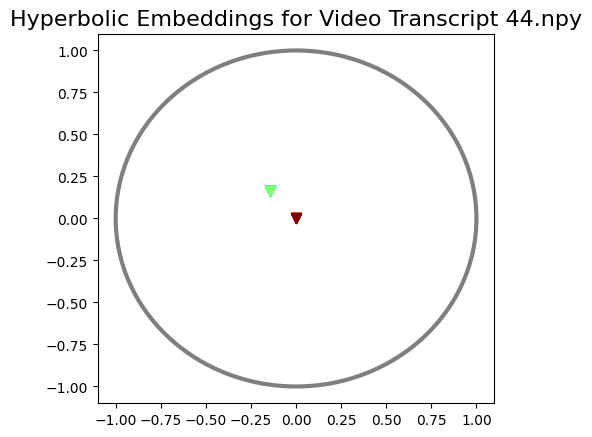

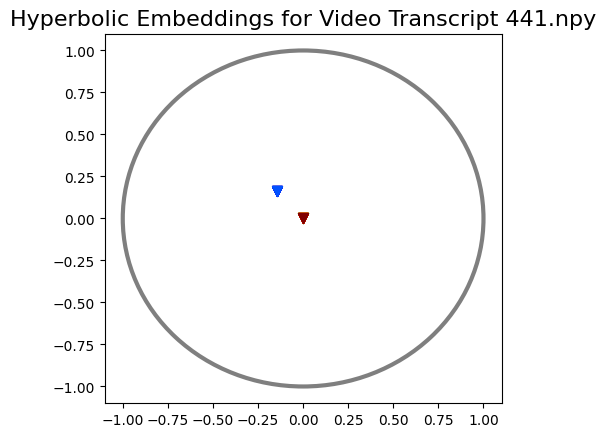

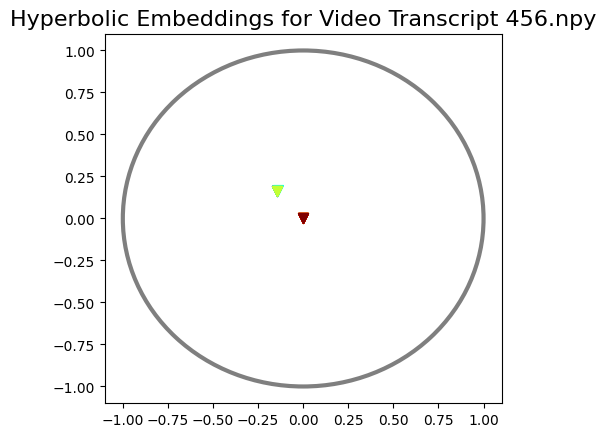

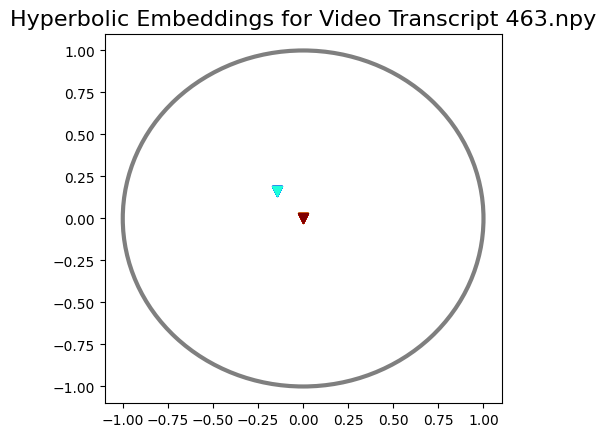

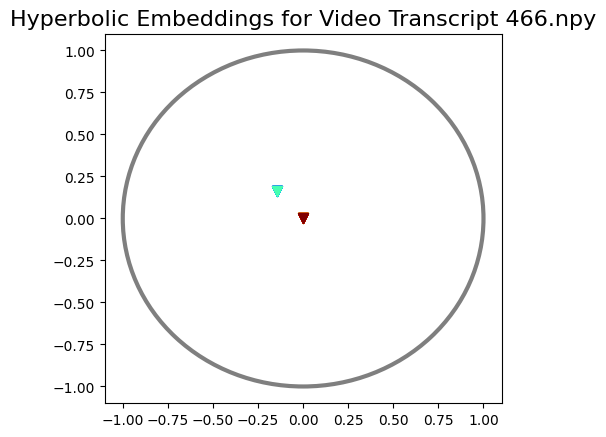

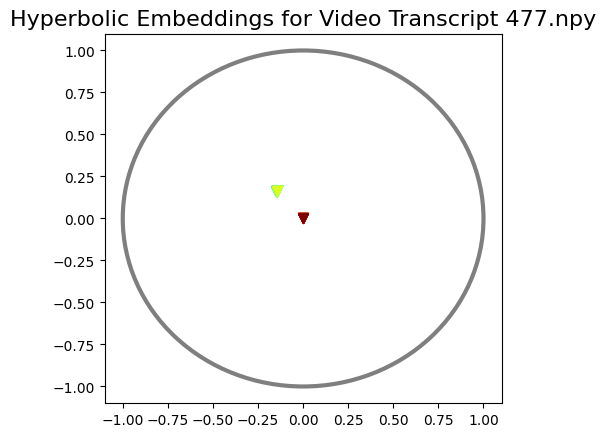

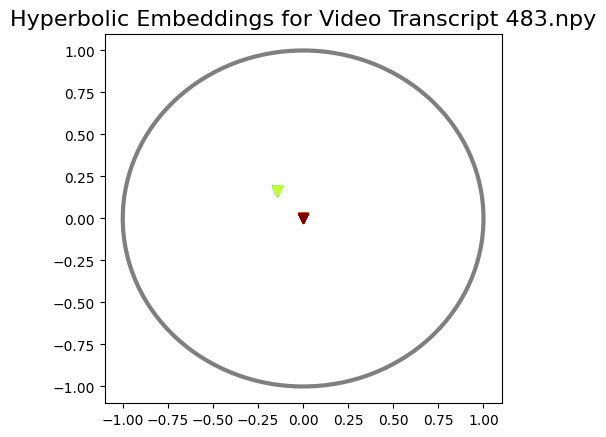

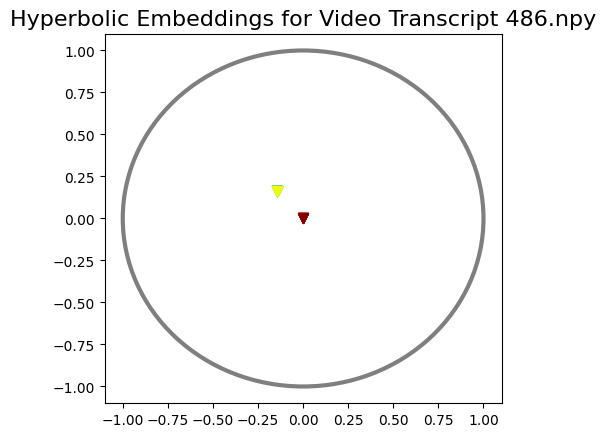

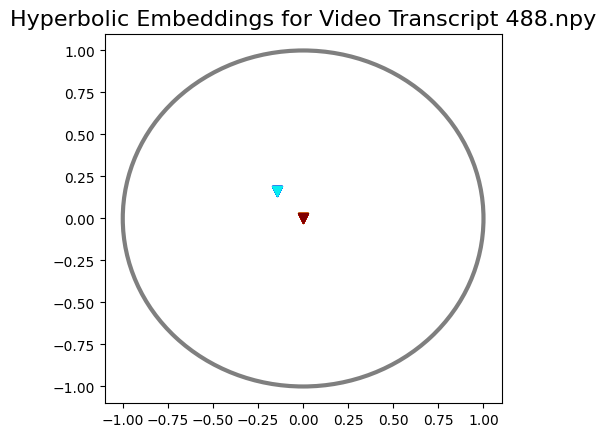

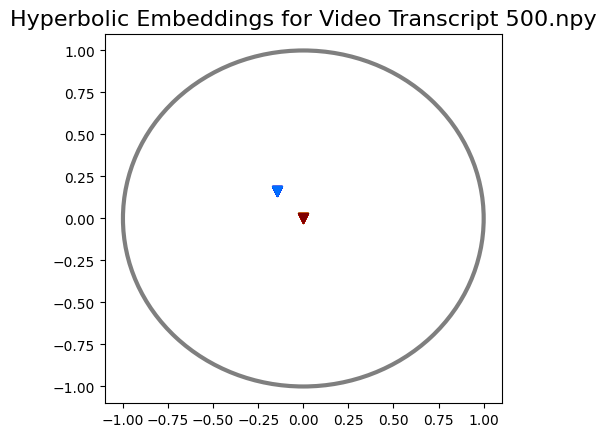

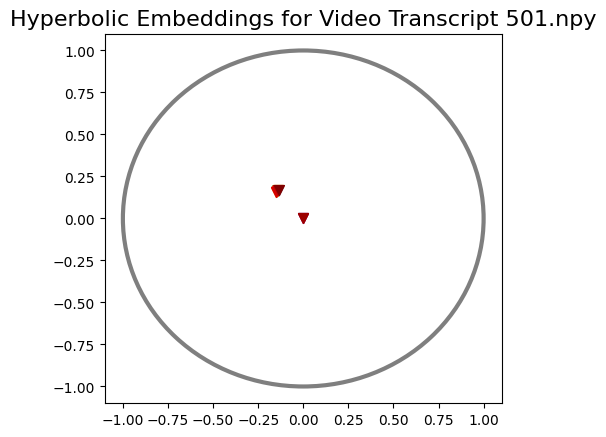

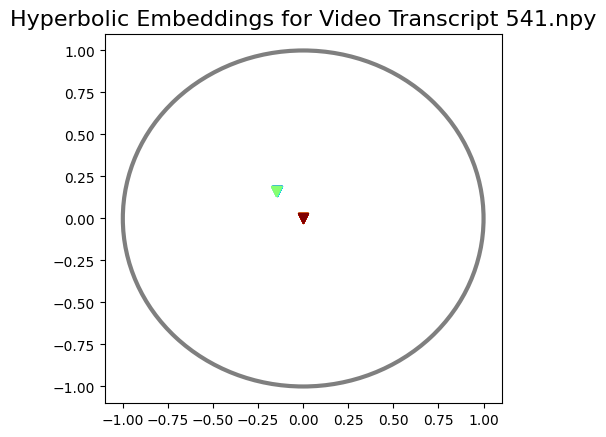

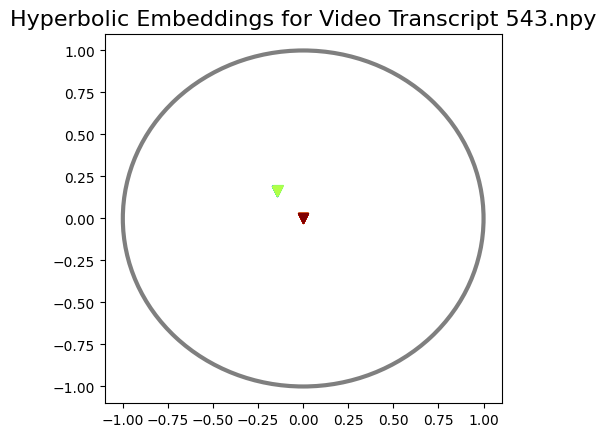

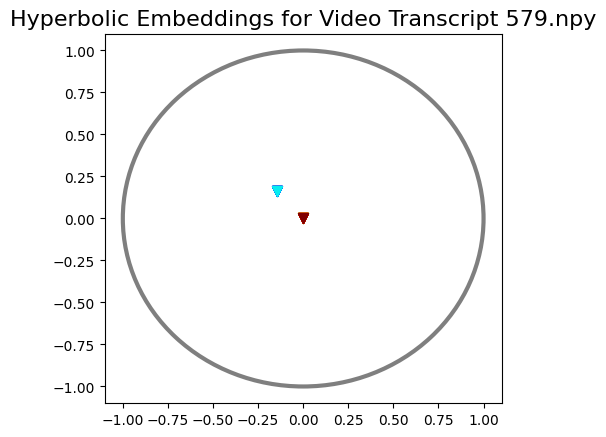

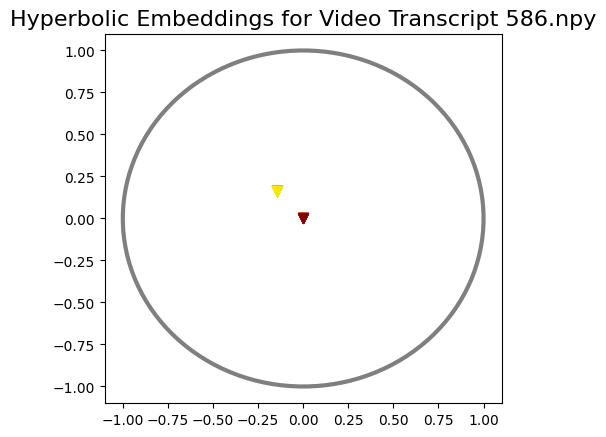

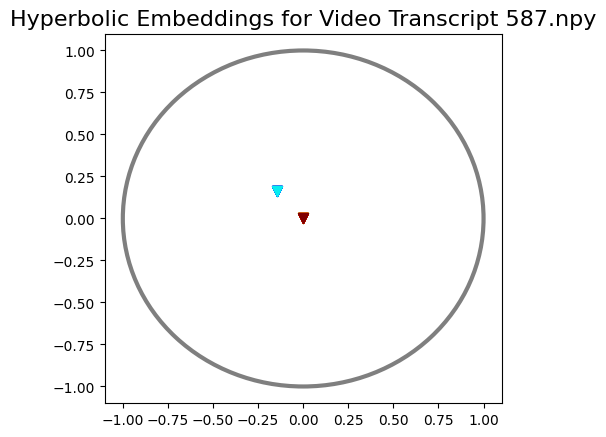

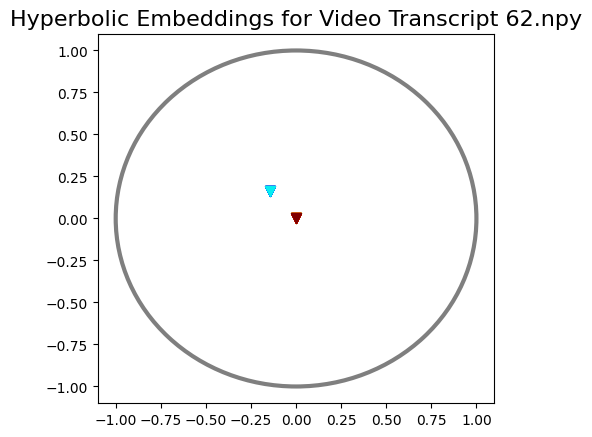

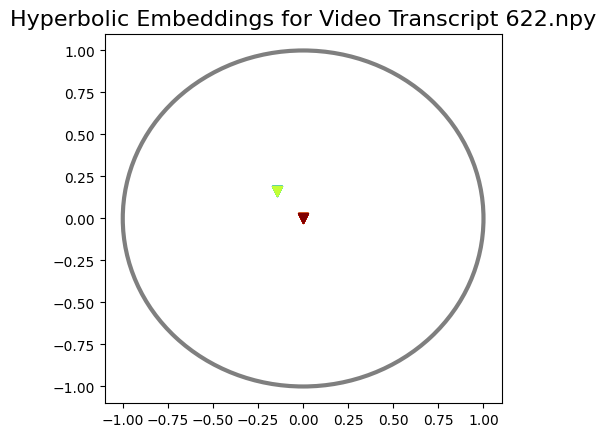

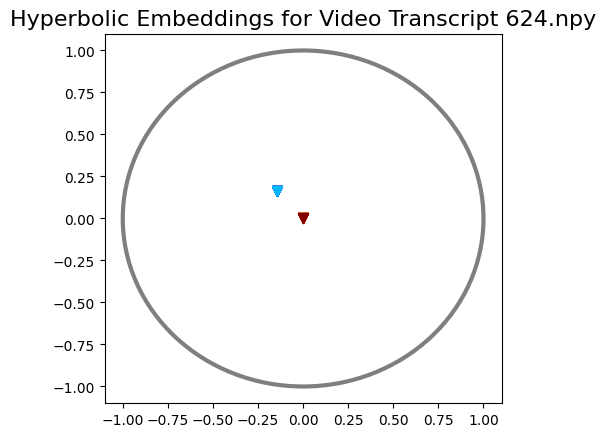

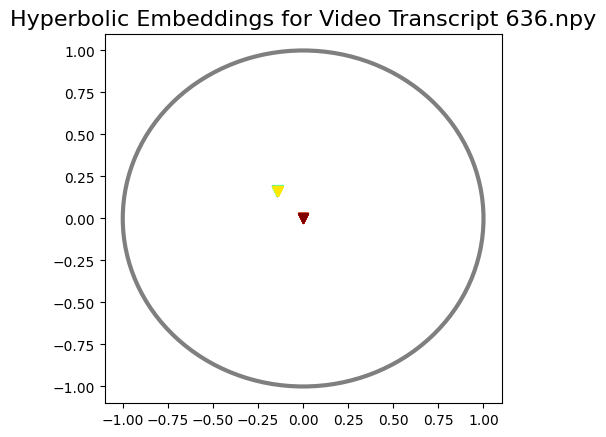

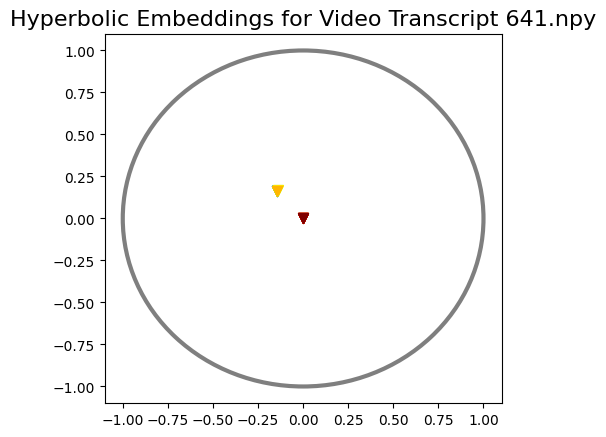

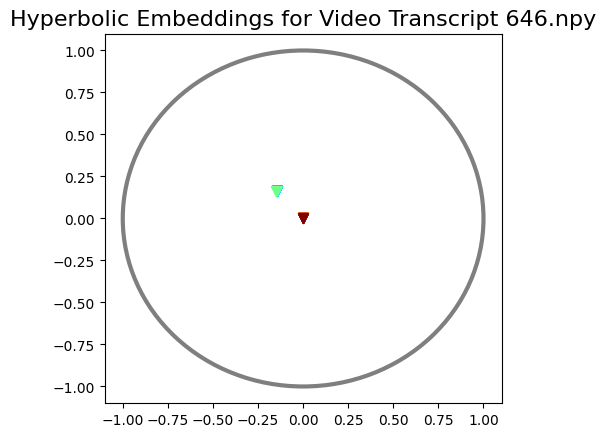

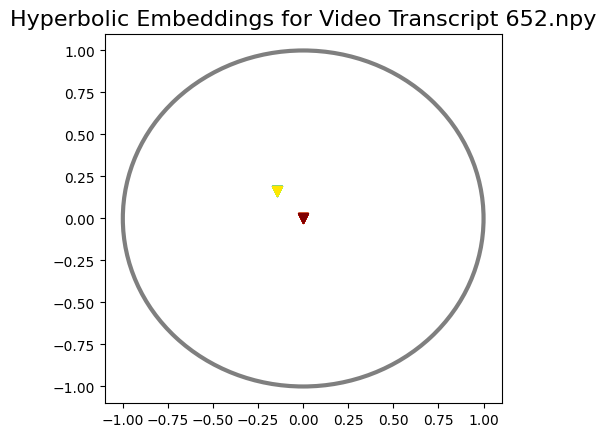

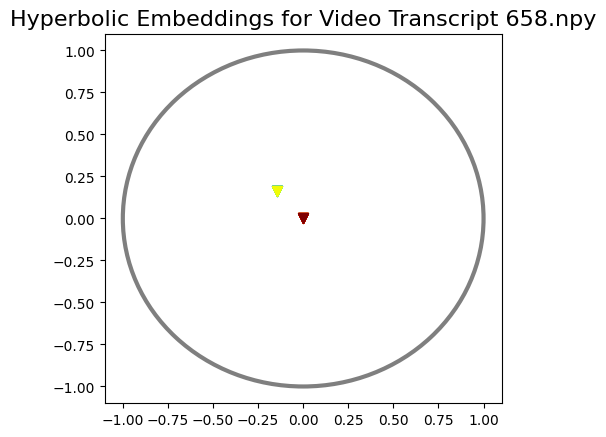

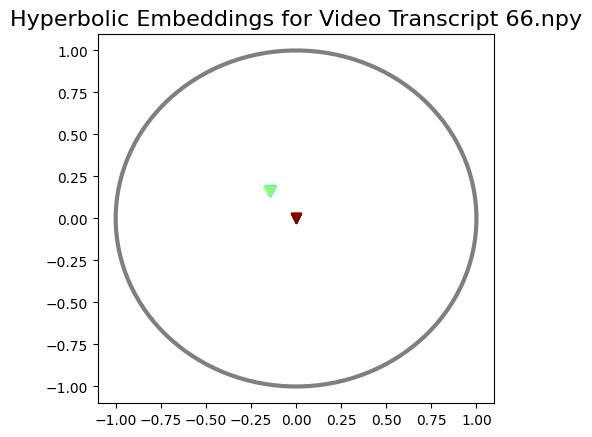

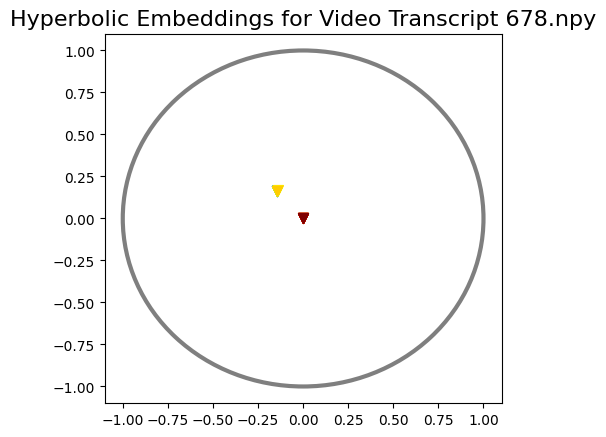

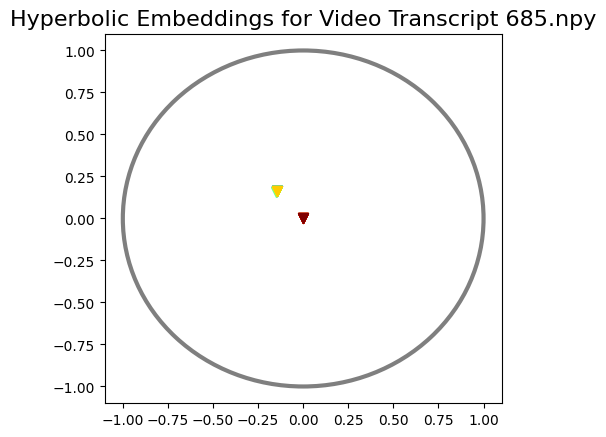

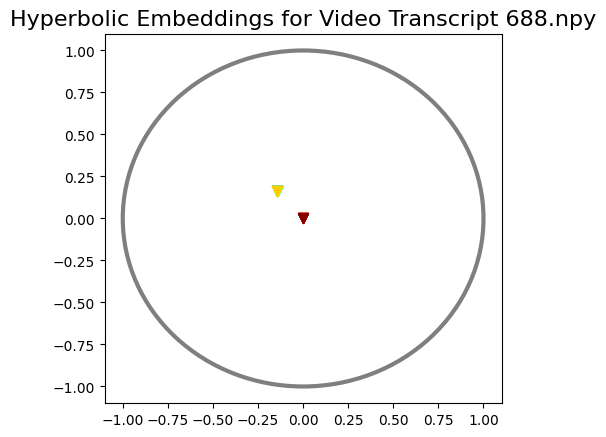

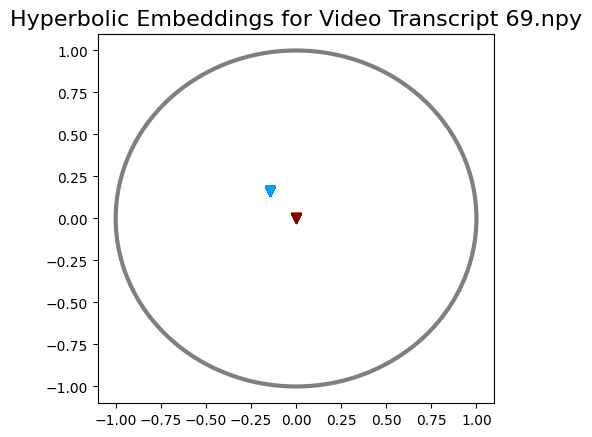

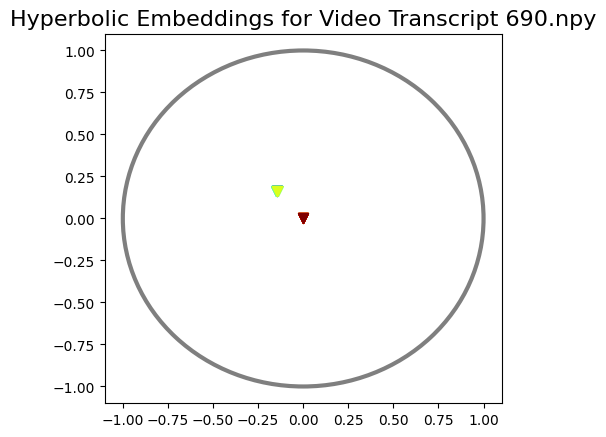

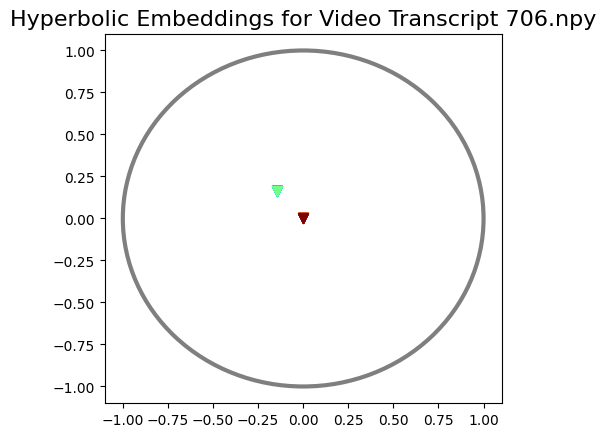

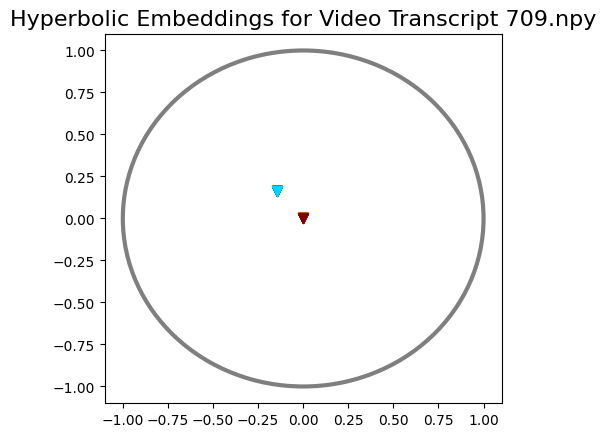

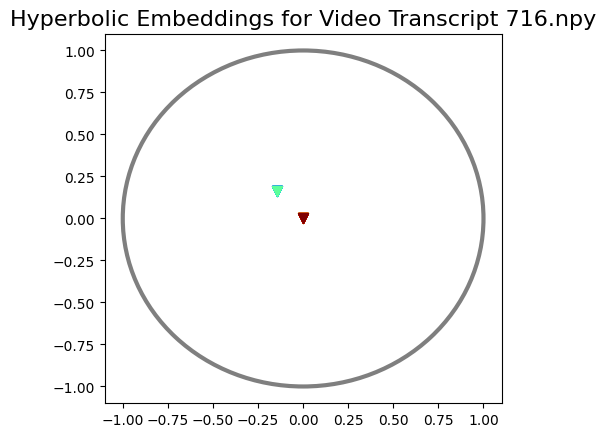

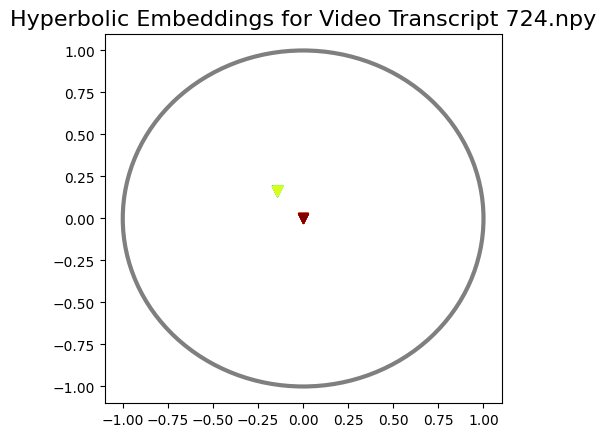

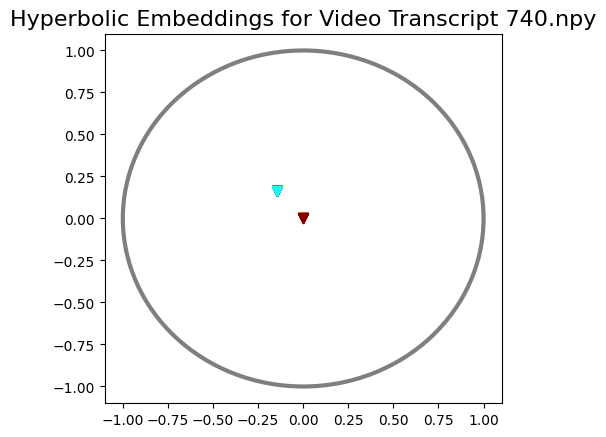

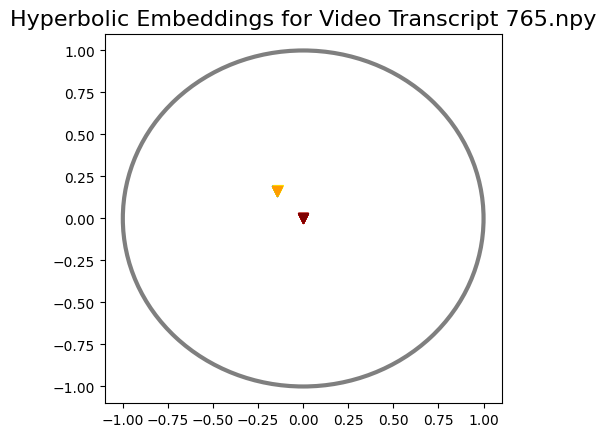

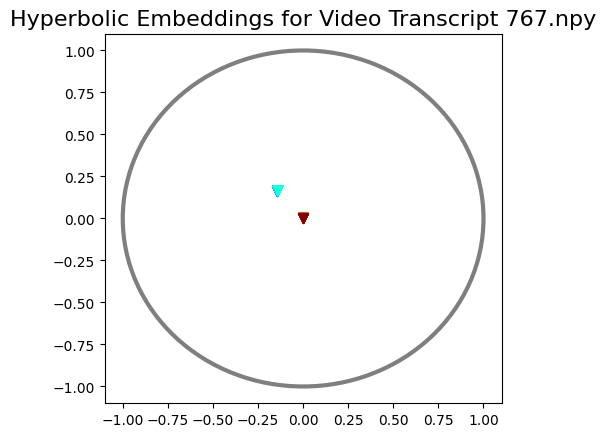

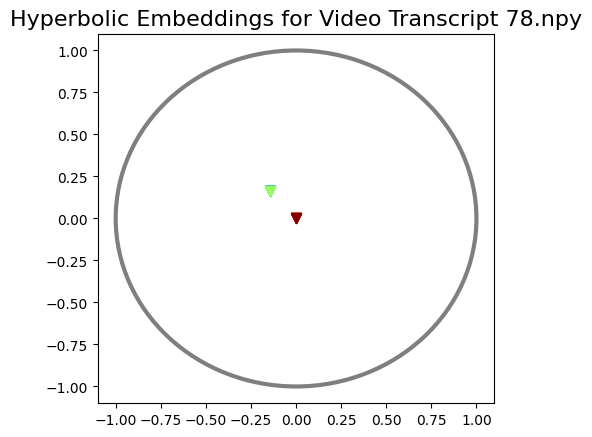

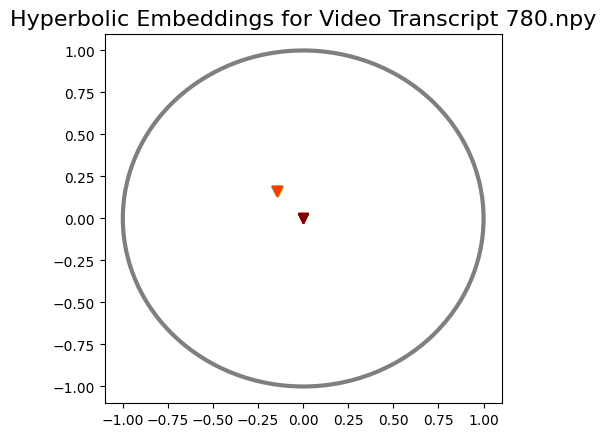

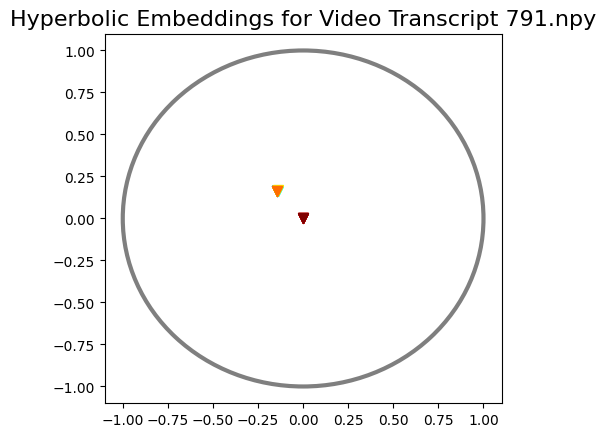

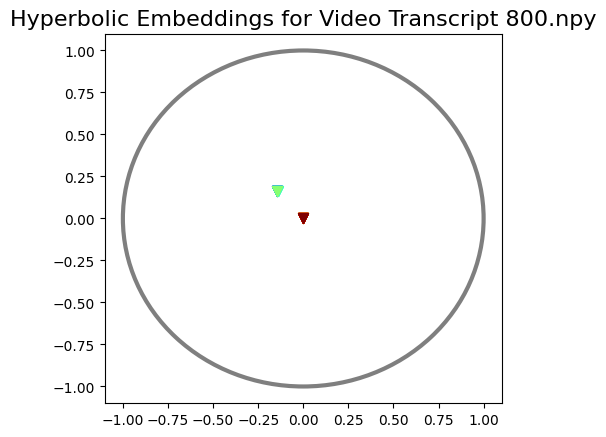

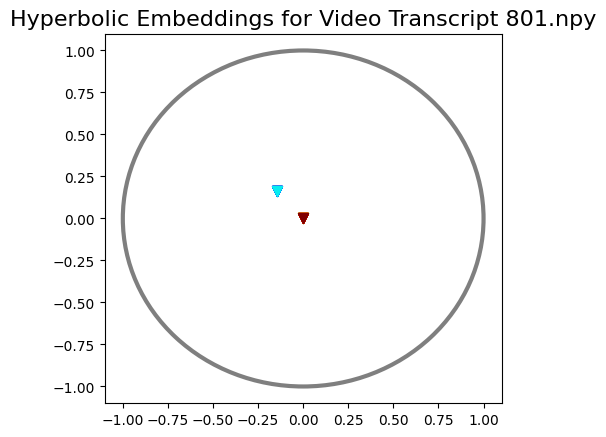

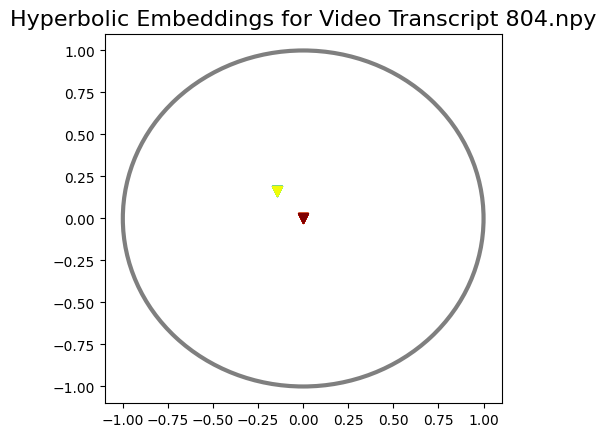

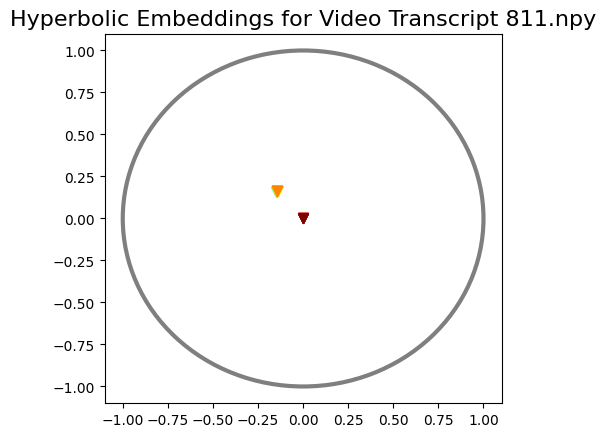

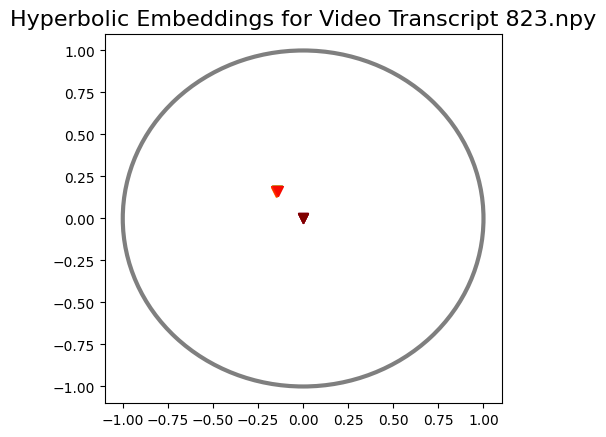

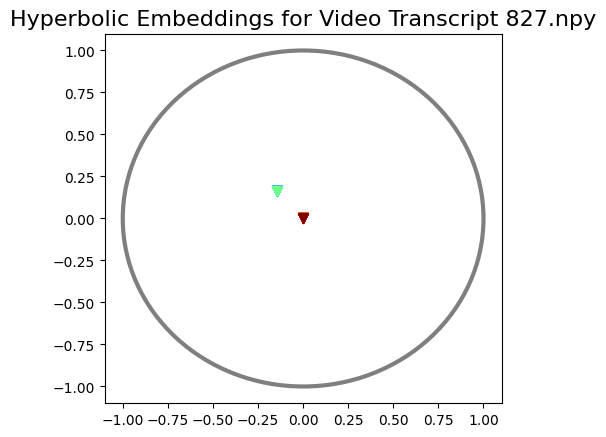

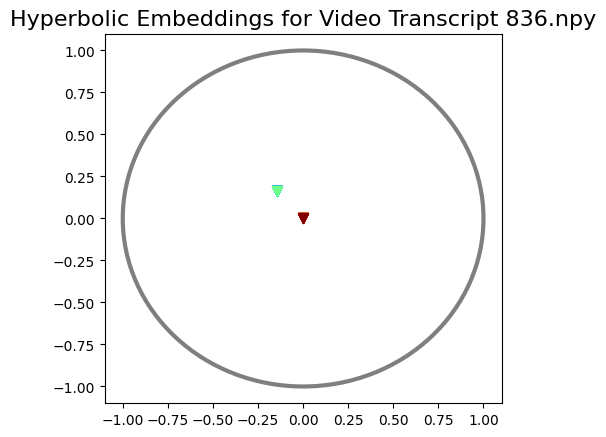

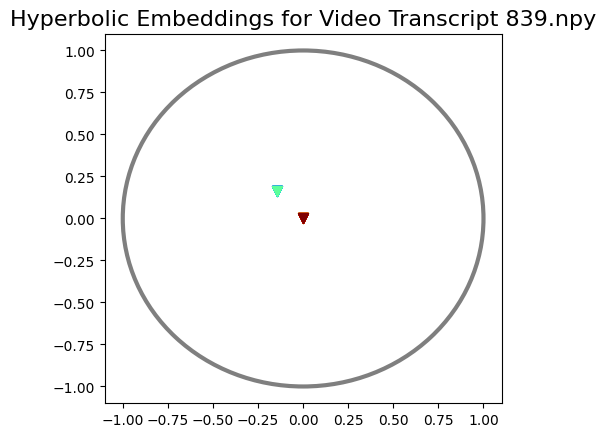

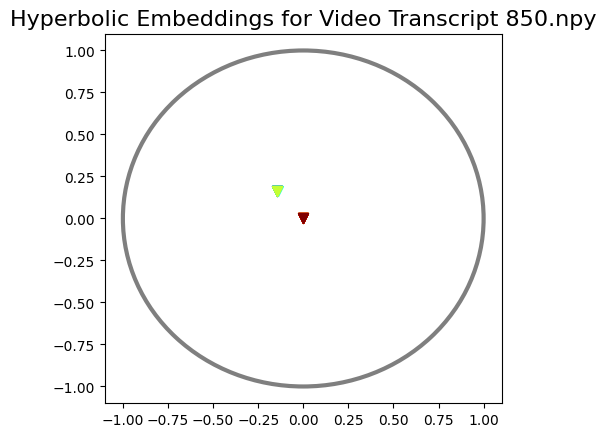

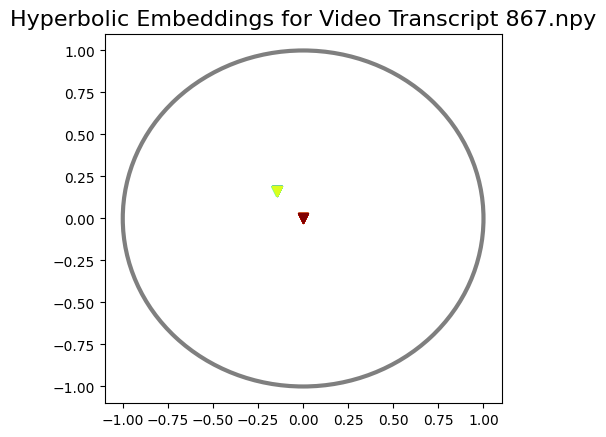

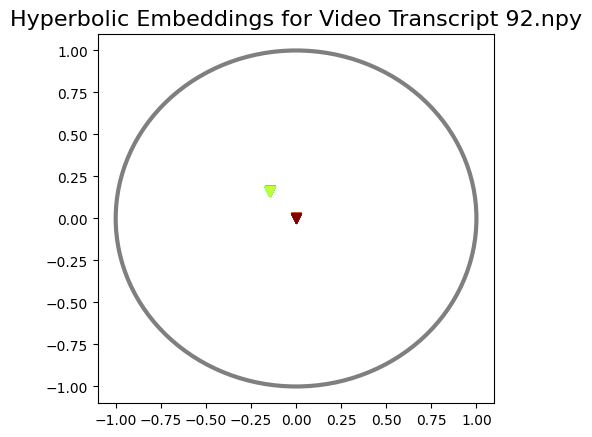

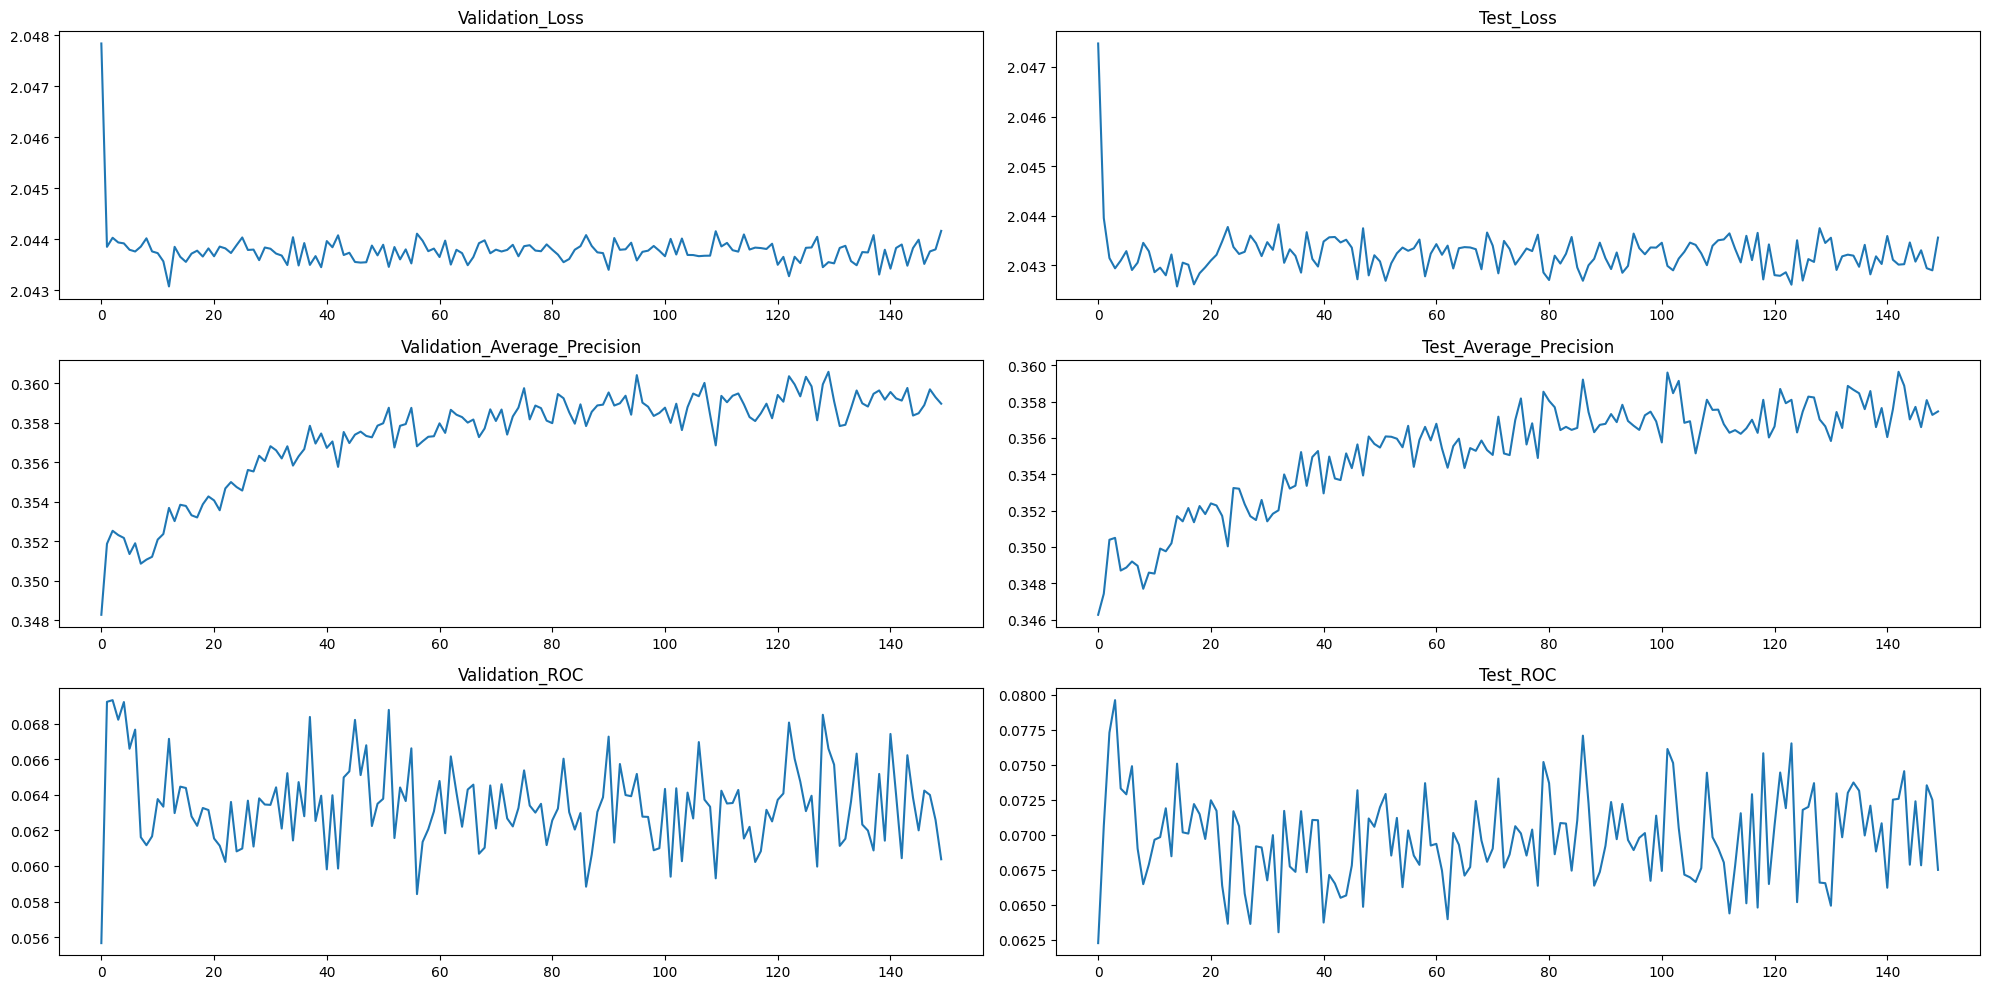

In [34]:
from visualization import plot_total_avg_hyperbolic_radii
from visualization import plot_embeddings_library_learning
from visualization import viz_metrics_multiple
import os
import numpy as np
import matplotlib.pyplot as plt
date = "2023_12_15"
log_num = '26'
log_path = os.path.join("logs", "lp", date, log_num)
embeddings_dir = os.path.join(log_path, 'embeddings')
log_path = os.path.join(os.getcwd(), 'logs', 'lp', date, log_num)
metrics_path = os.path.join(log_path, 'log.txt')

# plot_total_avg_hyperbolic_radii(embeddings_dir)
    
for train_embeddings_dir in os.listdir(embeddings_dir):
    if 'test' not in train_embeddings_dir: continue
    _, _, train_index_str = train_embeddings_dir.split("_")
    # print(os.path.join(log_path, 'embeddings', train_embeddings_dir))
    embeddings = np.load(os.path.join(log_path, 'embeddings', train_embeddings_dir))
    plt.figure()
    plot_embeddings_library_learning(embeddings, title=f"Hyperbolic Embeddings for Video Transcript {train_index_str}")
    
viz_metrics_multiple(metrics_path)

In [13]:
import pandas as pd
TRANSCRIPT_DATA_PATH = 'video_transcripts_with_hierarchy_mapped_truncated_conceptual_lda_1702443584.csv'

transcript_df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'library_learning', TRANSCRIPT_DATA_PATH))
view_count_labels = transcript_df['view_count']
ratio_labels = transcript_df['like_to_view_ratio']
score_labels = ratio_labels

In [22]:

# transcript_df['activity_concept_hierarchy'][]
import json
import networkx as nx
def get_adjacency_matrix_library_learning_size(graph_index : int, data_path : str):
    """
    Create adjacency matrix from threshold number by binarizing the float PLV matrix
    into a 1 and 0 matrix 

    """
    # First open csv file as pandas, then access pandas cell using graph_index, access activity_concept_hierarchy column
    # Then use json.loads to convert string to json, then access the adjacency matrix
    video_transcripts_df = transcript_df
    json_str = video_transcripts_df['activity_concept_hierarchy'][graph_index]
    # print("THIS IS JSON STR", json_str)
    try:
        json_graph = json.loads(json_str.replace("'", "\""))
    except:
        # In case dataset has a NaN Error
        print(f"Caught NaN Error, returning random adjacency matrix in graph index {graph_index}")
        return np.random.randint(0, 2, (MAX_CONCEPT_HIERARCHY_SIZE, MAX_CONCEPT_HIERARCHY_SIZE))
    # json_graph = json.load(open(os.path.join(data_path, "video_transcripts_with_hierarchy_1701550479.csv")))
    def add_nodes_edges(graph, node, parent=None):
        # Assign a unique identifier to each node using id(node)
        # node_num = np.random.randint(1000, 9999)
        node_id = f"{node['activity']}_{id(node)}"
        # node_id = f"{node['activity']}_{node_num}"
        
        # Add the current node to the graph
        if parent: graph.add_edge(parent, node_id)
        graph.add_node(node_id, primary_concept=node["primary_concept"])

        # If there are supporting concepts, add them as leaf nodes
        for supporting_concept in node.get("supporting_concepts", []):
            supporting_id = f"{supporting_concept}_{id(node)}"
            # supporting_id = f"{supporting_concept}_{node_num}"
            graph.add_node(supporting_id, primary_concept=supporting_concept)
            graph.add_edge(node_id, supporting_id)

        # If there are activities, recursively add them as sub-trees
        for activity in node.get("activities", []):
            activity_id = f"{activity['activity']}_{id(activity)}"
            # activity_num = np.random.randint(1000, 9999)
            # activity_id = f"{activity['activity']}_{activity_num}"
            graph.add_edge(node_id, activity_id)
            add_nodes_edges(graph, activity, parent=node_id)

    # Create a directed graph
    G = nx.DiGraph()
    # Add root node
    root_node_id = "lesson"
    root_primary_concept = "lesson"
    G.add_node(root_node_id, primary_concept=root_primary_concept)

    for lesson in json_graph["lesson"]:
        add_nodes_edges(G, lesson, parent=root_node_id)

    # Visualize the tree structure
    # pos = nx.spring_layout(G)
    # nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
    # plt.show()

    # # Convert the graph to an adjacency matrix
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    # NOTE: Networkx only gives upper triangular matrix, so we add the transpose to get the full adjacency matrix
    symmetric_matrix = adjacency_matrix + adjacency_matrix.T
    # Size of the expanded matrix
    return len(symmetric_matrix)


In [23]:
max_size = 0
for graph_index in range(872):
    max_size = max(max_size, get_adjacency_matrix_library_learning_size(graph_index, ""))

In [24]:
max_size

82

In [ ]:
import os
os.environ['DATAPATH'] = os.path.join(os.getcwd(), 'data')
os.environ['LOG_DIR'] = os.path.join(os.getcwd(), 'logs')

! python train_graph_iteration.py \
    --task lp \
    --act None \
    --dataset library_learning\
    --model HyboNet \
    --lr 0.025 \
    --dim 3 \
    --num-layers 2 \
    --bias 1 \
    --dropout 0.25 \
    --weight-decay 1e-3 \
    --manifold Lorentz \
    --log-freq 5 \
    --cuda -1 \
    --patience 500 \
    --grad-clip 0.1 \
    --seed 1234 \
    --save 1


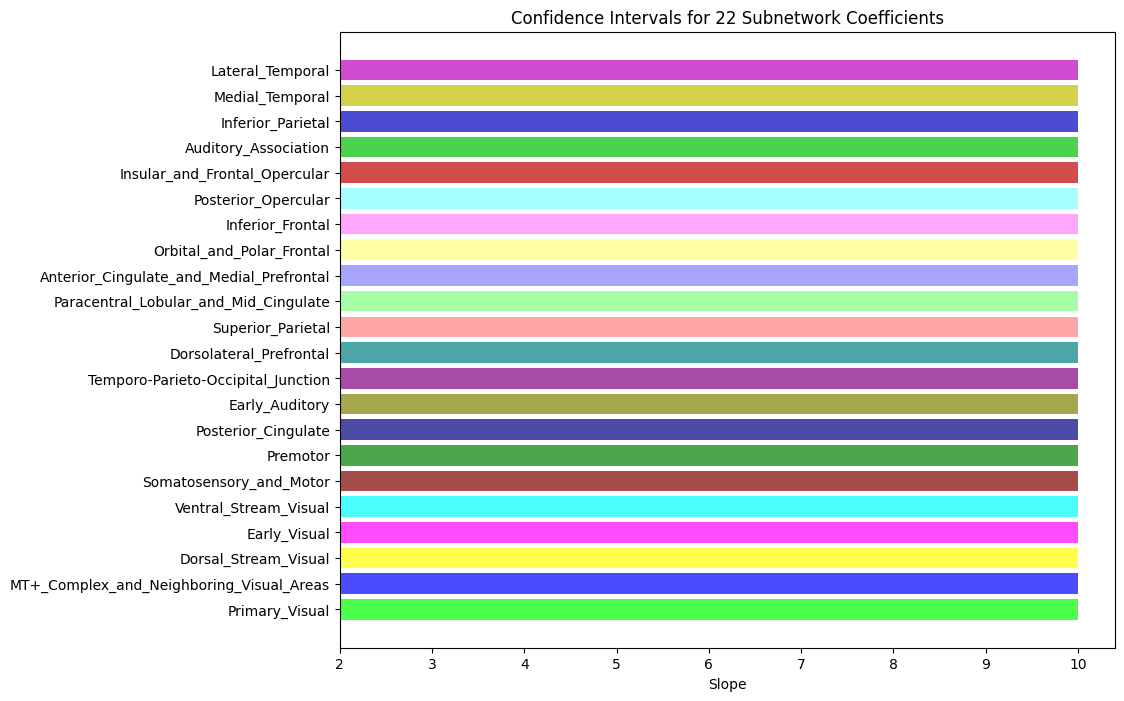

In [20]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 8))
COLORS = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', 
            '#00ffff', '#800000', '#008000', '#000080', '#808000', 
            '#800080', '#008080', '#ff8080', '#80ff80', '#8080ff', 
            '#ffff80', '#ff80ff', '#80ffff', '#c00000', '#00c000', 
            '#0000c0', '#c0c000', '#c000c0']
CORTEX_TO_ABBREVIATION = {
    'Primary_Visual': 'PV',
    'MT+_Complex_and_Neighboring_Visual_Areas': 'MT+CNVS',
    'Dorsal_Stream_Visual': 'DSV',
    'Early_Visual': 'EV',
    'Ventral_Stream_Visual': 'VSV',
    'Somatosensory_and_Motor': 'SM',
    'Premotor': 'Pre',
    'Posterior_Cingulate': 'PC',
    'Early_Auditory': 'EA',
    'Temporo-Parieto-Occipital_Junction': 'TPOJ',
    'Dorsolateral_Prefrontal': 'DP',
    'Superior_Parietal': 'SP',
    'Paracentral_Lobular_and_Mid_Cingulate': 'PLMC',
    'Anterior_Cingulate_and_Medial_Prefrontal': 'ACMP',
    'Orbital_and_Polar_Frontal': 'OPF',
    'Inferior_Frontal': 'IF',
    'Posterior_Opercular': 'PO',
    'Insular_and_Frontal_Opercular': 'IFO',
    'Auditory_Association': 'AA',
    'Inferior_Parietal': 'IP',
    'Medial_Temporal': 'MT',
    'Lateral_Temporal': 'LT'
}
# Stacked bar plot for each statistic
confidence_intervals = [[2 , 10] for x in range(22)]
for i in range(len(confidence_intervals)):
    ax.barh(i, confidence_intervals[i][1] - confidence_intervals[i][0], left=confidence_intervals[i][0], height=0.8, color=COLORS[i + 1], alpha=0.7)    
    # ax.plot([confidence_intervals[i][0], confidence_intervals[i][1]], [i, i], color='black', linewidth=2)  # Whiskers

# Customize the plot
ax.set_yticks(np.arange(len(confidence_intervals)))
subnetwork_names = [*CORTEX_TO_ABBREVIATION.keys()]
ax.set_yticklabels([subnetwork_names[i] for i in range(len(confidence_intervals))])
ax.set_xlabel('Slope')
ax.set_title('Confidence Intervals for 22 Subnetwork Coefficients')

plt.show()
# # Customize the plot
# ax.set_yticks(np.arange(len(confidence_intervals)))
# ax.set_yticklabels(['Statistic {}'.format(i+1) for i in range(len(confidence_intervals))])
# ax.set_xlabel('Slope')
# ax.set_title('Confidence Intervals for 22 Statistics')

# plt.show()

In [21]:

# Assume data is a 3D array with dimensions: (subjects, datapoints, decades)
# Each slice along the second axis represents the datapoints for one subject.
# Each slice along the third axis represents the decades.
# For simplicity, let's assume you have a function to calculate slopes for each statistic.
def calculate_slopes(data):
    slopes = []
    for statistic in data:
        model = LinearRegression()
        print(statistic)
        model.fit(np.arange(7).reshape(1, 7), statistic)
        slopes.append(model.coef_[0])
    return slopes

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Bootstrap loop
bootstrap_slopes = []
for _ in range(num_bootstrap_samples):
    # Create a bootstrap sample
    bootstrap_sample = data[np.random.choice(data.shape[0], size=data.shape[0], replace=True)]

    # Calculate slopes for the bootstrap sample
    bootstrap_slopes.append(calculate_slopes(bootstrap_sample))

# Calculate confidence intervals for each statistic
confidence_intervals = np.percentile(bootstrap_slopes, [2.5, 97.5], axis=0)


NameError: name 'data' is not defined